<a href="https://colab.research.google.com/github/BehrangEbrahimi13/Repo_Paper_01/blob/main/Paper_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GitHub and GoogleDrive

## Mount drive

In [15]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Git clone

In [16]:
!git clone https://github.com/BehrangEbrahimi13/Repo_Paper_01.git

Cloning into 'Repo_Paper_01'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 128.70 KiB | 1.02 MiB/s, done.
Resolving deltas: 100% (8/8), done.


# Algorithm 1 PMIC-based Feature Selection

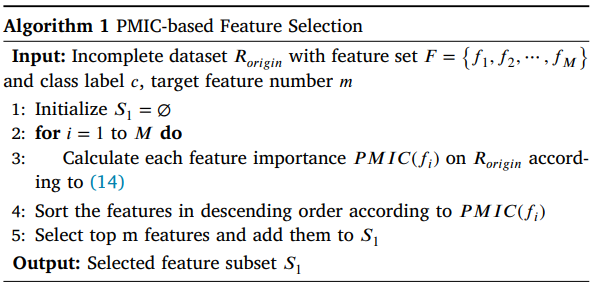


In [ ]:
!pip install minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187015 sha256=e541e350b788cd6d80692eff6eddc4f7a40bacb078039246d79cbaf95f7e2bdf
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [ ]:
# Example calculate_mic

from minepy import MINE

def calculate_mic(x, y):
    mine = MINE()
    mine.compute_score(x, y)
    mic = mine.mic()
    return mic

# Example usage
x = [1, 2, 3, 4, 5]
y = [2, 4, 2, 8, 10]

mic_score = calculate_mic(x, y)
print("MIC score:", mic_score)

MIC score: 0.41997309402197447


In [ ]:
import numpy as np
from minepy import MINE

def pmic_feature_selection(X, y, m):
    num_features = X.shape[1]
    pmic_scores = np.zeros(num_features)
    for i in range(num_features):
        # Select column i without null values
        feature_without_null = X[~np.isnan(X[:, i]), i]
        # print(feature_without_null)

        # Filter y based on non-null values in column i
        filtered_y = y[~np.isnan(X[:, i])]
        # print(filtered_y)

        mine = MINE()
        mine.compute_score(feature_without_null, filtered_y)
        pmic_scores[i] = mine.mic()
        # print(pmic_scores[i])
        # print("\n")
    top_m_idx = np.argsort(pmic_scores)[::-1][:m]
    return top_m_idx

np.random.seed(47)

# Generate a random 5x4 array with one-digit random values (0-9)
X = np.random.randint(0, 10, (5, 4)).astype(float)

# Generate a random 5x1 array with one-digit random values (0-9)
y = np.random.randint(0, 10, (5))

# Randomly select indices for null values
null_indices = np.random.choice(range(X.size), size=int(X.size / 2), replace=False)

# Set null values at the selected indices
X.ravel()[null_indices] = np.nan

m = 3
selected_idx = pmic_feature_selection(X, y, m)
selected_features = X[:, selected_idx]

print("X:")
print(X)

print("y:")
print(y)

print("\nSelected Features:")
print(selected_features)

X:
[[ 7.  6.  7.  8.]
 [ 8.  3. nan nan]
 [nan  7. nan nan]
 [nan  2.  2. nan]
 [nan nan  8. nan]]
y:
[2 9 1 5 0]

Selected Features:
[[ 6.  7.  7.]
 [ 3.  8. nan]
 [ 7. nan nan]
 [ 2. nan  2.]
 [nan nan  8.]]


# Import data set


In [17]:
import pandas as pd

%cd '/content/drive/MyDrive/ColabNotebooks/Datasets'

!ls # List files and directories

madelonData = pd.read_csv('madelon.csv')

/content/drive/MyDrive/ColabNotebooks/Datasets
madelon.csv


# Func: add_random_null and generate_random_array

In [13]:
import random
import numpy as np
import pandas as pd

def generate_random_array(n, m):
    # random_array = np.random.rand(n * m).reshape(n, m)
    # return pd.DataFrame(random_array)
    random_array = np.random.uniform(0, 800, size=(n, m)).round(3)
    return pd.DataFrame(random_array)

def add_random_null(dataFrame, percent, seed=None):
    if seed is not None:
        random.seed(seed)  # Set a seed for reproducible results
    else:
        random.seed()  # Use system time as the seed for randomness

    size = dataFrame.size;
    # Calculate the number of elements to set as null
    num_nulls = int(percent * size)

    # Generate random indices to set as null
    # indices = random.sample(range(size), num_nulls)
    indices = np.random.choice(size, num_nulls, replace=False)

    # Set the randomly selected indices as None
    df_flat = dataFrame.values.flatten().astype(float)  # Convert to float
    df_flat[indices] = np.nan

    # Reshape the modified array back to the original shape
    modified_array = df_flat.reshape(dataFrame.shape)

    # Convert the modified array back to a DataFrame
    modified_dataframe = pd.DataFrame(modified_array, columns=dataFrame.columns)

    return modified_dataframe

original_data = generate_random_array(5, 5)
modified_data = add_random_null(dataFrame=original_data, percent=0.3, seed=42)


print("Original Data:\n", original_data)
print("\nModified Data:\n", modified_data)

Original Data:
          0        1        2        3        4
0  441.908  303.551  531.049  566.189  449.324
1  641.009  766.134  683.958  456.897  516.534
2  322.408   39.399  156.223  730.153  595.789
3  159.314  549.979  558.950   49.022  295.991
4  706.293  586.368   54.830  209.172  336.041

Modified Data:
          0        1        2        3        4
0  441.908  303.551  531.049  566.189  449.324
1      NaN      NaN  683.958      NaN      NaN
2      NaN   39.399  156.223  730.153  595.789
3  159.314  549.979  558.950   49.022  295.991
4  706.293  586.368      NaN      NaN  336.041


# Algorithm 2 Non-negative Latent Factor
Imputes the missing values


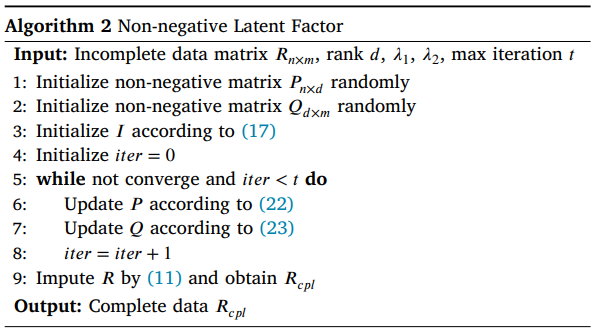


In [43]:
import numpy as np
import time

# Description:
# R: Incomplete data matrix of shape (n, m).
# d: Rank of the non-negative latent factors.
# lambda1, lambda2: Regularization parameters.
# max_iter: Maximum number of iterations.

def Imputes_the_missing_values_By_non_negative_latent_factor(R, d, lambda1, lambda2, max_iter):
    # Initialize non-negative matrix P randomly
    n, m = R.shape
    R_copy = np.copy(R)
    P = np.random.rand(n, d)

    # Initialize non-negative matrix Q randomly
    Q = np.random.rand(d, m)

    # Initialize I according to (17)
    I = np.ones((n, m))
    R_nan_mask = np.isnan(R_copy)
    I[R_nan_mask] = 0

    # Set zero for Null
    R_copy[R_nan_mask] = 0

    # Initialize iteration counter
    iter = 0

    # Convergence criterion
    converge = False

    while not converge and iter < max_iter:
        # Update P according to (22)
        P_new = P * ((I * R_copy) @ Q.T) / ((I * (P @ Q)) @ Q.T + lambda1 * P)

        # Update Q according to (23)
        Q_new = Q * (P_new.T @ (I * R_copy)) / (P_new.T @ (I * (P_new @ Q)) + lambda2 * Q)

        # Check convergence
        if np.allclose(P, P_new) and np.allclose(Q, Q_new):
            converge = True

        # Update P and Q
        P = P_new
        Q = Q_new

        # Increment iteration counter
        iter += 1

    # Impute R by (11) and obtain R_cpl
    PQ = np.round( P @ Q, decimals=3)
    R_cpl = np.where(R_nan_mask, PQ, R)

    print('\n P: \n', P)
    print('\n Q : \n', Q)
    print('\n P @ Q: \n', P @ Q)

    return R_cpl


# Example usage
# R = np.array([[1, 2, np.nan, 4],
#               [np.nan, 5, 0, np.nan],
#               [7, np.nan, 9, 10]])

# madelonData_without_class = generate_random_array(3, 4)

# Dropping the 'Class' column
madelonData_without_class = madelonData.drop('Class', axis=1)

R = add_random_null(dataFrame=madelonData_without_class, percent=0.3, seed=42)

d = 2
lambda1 = 0.1
lambda2 = 0.2
max_iter = 100


# Capture the start time
start_time = time.time()

# Code execution
R_cpl = Imputes_the_missing_values_By_non_negative_latent_factor(R, d, lambda1, lambda2, max_iter)

print("\nComplete data after imputation: \n", R_cpl)

print("Original incomplete data: \n", R)

print("\noriginal data: \n", madelonData_without_class)

# Capture the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("\nElapsed time: {:.2f} seconds".format(elapsed_time))

# Calculate the minimum square error
mse = np.mean((madelonData_without_class - R_cpl) ** 2)

# Filter the MSE values where the value is greater than zero
filtered_mse = np.where(mse > 0., mse, 0)

# print("\nRounded sum filtered Mean Squared Error:", filtered_mse)

filtered_mse_sum = round(np.sum(filtered_mse), 3)

print("\nRounded sum filtered Mean Squared Error:", filtered_mse_sum)


 P: 
 [[407.04192606 404.37507223]
 [419.23129175 387.58458433]
 [411.17781156 396.91997906]
 ...
 [411.14720707 395.87910582]
 [409.68020529 398.49841938]
 [402.92980695 411.3169599 ]]

 Q : 
 [[0.58899966 0.58198558 0.64636304 0.53264173 0.64330161 0.50563772
  0.72951453 0.68862966 0.55195495 0.63059961 0.68117366 0.67336798
  0.54037958 0.60330681 0.59653612 0.59660034 0.59210978 0.71399809
  0.57081561 0.55107477 0.70720672 0.58647897 0.97792448 0.65488972
  0.6251649  0.65251573 0.52549135 0.60477924 0.49808614 0.66524165
  0.57274991 0.31062252 0.42197982 0.82193283 0.6090936  0.59727608
  0.59381847 0.74279842 0.61342357 0.87171217 0.6816583  0.63707645
  0.4747416  0.5257229  0.62100845 0.59322748 0.56497132 0.71616448
  0.61009816 0.71521923 0.62744846 0.56066678 0.46973586 0.579859
  0.68114732 0.57979897 0.76421436 0.65268674 0.75403151 0.65605202
  0.64770151 0.51801099 0.63804758 0.62374883 0.55500609 0.69496189
  0.59816218 0.77647081 0.58524486 0.62015308 0.6440814  0.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Reg

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a sample DataFrame
data = pd.DataFrame({'X': [1, 2, 3, 4, 5],
                     'Y': [2, 4, 6, None, None]})  # Simulating null values

# Split the DataFrame into non-null and null sets
non_null_data = data.dropna()
null_data = data[data['Y'].isnull()]

# Prepare the training data
X_train = non_null_data[['X']]
y_train = non_null_data['Y']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values
X_test = null_data[['X']]
y_pred = model.predict(X_test)

# Replace the null values with the predicted values in the original DataFrame
data.loc[data['Y'].isnull(), 'Y'] = y_pred

# Print the updated DataFrame
print(data)

   X     Y
0  1   2.0
1  2   4.0
2  3   6.0
3  4   8.0
4  5  10.0


# Householder based QR decomposition

In [38]:
import numpy as np
from typing import Union
import time

def householder(x: np.ndarray) -> Union[np.ndarray, int]:
    alpha = x[0]
    s = np.power(np.linalg.norm(x[1:]), 2)
    v = x.copy().reshape(-1, 1)  # Reshape v as column vector

    if s == 0:
        tau = 0
    else:
        t = np.sqrt(alpha**2 + s)
        v[0] = alpha - t if alpha <= 0 else -s / (alpha + t)

        tau = 2 * v[0]**2 / (s + v[0]**2)
        v /= v[0]

    return v, tau


def qr_decomposition(A: np.ndarray) -> Union[np.ndarray, np.ndarray]:
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)

    for j in range(min(m, n)):
        v, tau = householder(R[j:, j])
        H = np.identity(m)
        H[j:, j:] -= tau * v @ v.T
        R = H @ R
        Q = H @ Q

    return Q[:, :n].T, R[:n]

def Imputes_the_missing_values_By_qr_decomposition(A):
    A_nan_mask = np.isnan(A)
    A[A_nan_mask] = 0
    Q, R = qr_decomposition(A)
    QR = Q @ R
    A_cpl = np.where(A_nan_mask, QR, A)

    with np.printoptions(linewidth=9999, precision=20, suppress=True):
      print("\nQ from qr_decomposition: \n", Q)
      print("\nR from qr_decomposition: \n", R)
      print("\nQ*R rounded from qr_decomposition:: \n", np.round(Q @ R, decimals=3))

    return A_cpl

# Example usage
# A = np.array([[1, 2, np.nan, 4, 8],
#               [np.nan, 5, 6, np.nan, 2],
#               [1, 2, 9, 4, np.nan],
#               [8, 5, np.nan, 2, 5]])

# A = generate_random_array(4, 6)

# Select the top 500 rows
A = madelonData.head(500).drop('Class', axis=1)

# A = madelonData

A_with_null = add_random_null(dataFrame = A, percent = 0.3, seed = 42)

A_replace_null_copy = A_with_null.copy()

# Set zero for Null
A_replace_null_copy[np.isnan(A_replace_null_copy)] = 0

print("A: \n", A)
print("A_replace_null_copy: \n", A_replace_null_copy)

q, r = np.linalg.qr(A_replace_null_copy)

with np.printoptions(linewidth=9999, precision=20, suppress=True):
  print("\nQ from np.linalg.qr: \n", q)
  print("\nR from np.linalg.qr: \n", r)
  print("\nQ*R rounded from np.linalg.qr:: \n", np.round(q @ r, decimals=3))

# Capture the start time
start_time = time.time()

# Code execution
A_cpl = Imputes_the_missing_values_By_qr_decomposition(A_with_null.copy().values)
with np.printoptions(linewidth=9999, precision=20, suppress=True):
  print("\nComplete rounded data after imputation: \n", np.round(A_cpl, decimals=3))

# Capture the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))


A: 
       V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V491  V492  V493  \
0    485  477  537  479  452  471  491  476  475  473  ...   477   481   477   
1    483  458  460  487  587  475  526  479  485  469  ...   463   478   487   
2    487  542  499  468  448  471  442  478  480  477  ...   487   481   492   
3    480  491  510  485  495  472  417  474  502  476  ...   491   480   474   
4    484  502  528  489  466  481  402  478  487  468  ...   488   479   452   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
495  493  465  484  497  505  475  430  477  517  473  ...   435   481   507   
496  467  472  493  490  450  473  515  475  480  485  ...   493   482   524   
497  491  437  470  476  491  478  472  478  483  475  ...   494   483   481   
498  498  494  536  487  477  484  459  477  457  488  ...   516   478   455   
499  474  503  572  472  491  483  543  477  494  480  ...   494   475   480   

     V494  V495  V496  V497  V498 

In [55]:
import numpy as np

# Input matrix with missing values
A = pd.DataFrame(np.array([[1, 2, 8, 4, 8],
              [2, 5, 6, 1, 2],
              [1, 2, 9, 4, 12],
              [1, 2, 9, 4, 7],
              [8, 5, 4, 2, 5]]))

# Select the top 500 rows
# A = madelonData.head(500).drop('Class', axis=1)

A_with_null = add_random_null(dataFrame = A, percent = 0.3, seed = 42)

# Mask for missing values
mask = np.isnan(A_with_null)

# Impute missing values (replace NaNs with zeros)
A_with_null[mask] = 0

# Perform QR decomposition in 'raw' mode (Householder)
H, tau = np.linalg.qr(A_with_null, mode='raw')

print("\nH", H)
print("\ntau", tau)

# Estimate missing values
QH = np.dot(H, np.diag(tau))
print("\nQH: ", QH)
estimated_A = np.dot(QH, QH.T)
print(estimated_A)

# Fill in the estimated values
estimated_A = np.where(mask, estimated_A, A)

print("\nA : \n", A)
print("\nA_with_null replace 0 : \n", A_with_null)

# Print the estimated matrix
print("\nEstimated Matrix: \n", estimated_A)


H [[-8.18535277e+00  0.00000000e+00  1.08868981e-01  1.08868981e-01
   8.70951851e-01]
 [-5.61979444e+00 -2.32764053e+00  5.02844286e-01  5.02844286e-01
  -7.03061341e-01]
 [-7.08582777e+00 -1.38247741e+01 -8.16496581e-01  3.32059545e-01
   4.74991967e-01]
 [-2.44338889e+00 -1.83389860e+00 -1.63299316e+00  3.00000000e+00
   1.34593534e-03]
 [-6.71931944e+00 -7.40612897e+00  3.67423461e+00 -4.66666667e+00
   1.64991582e+00]]

tau [1.12216944 1.         1.49713944 1.99999638 0.        ]

QH:  [[ -9.18535277   0.           0.16299205   0.21773757   0.        ]
 [ -6.3063616   -2.32764053   0.75282801   1.00568675   0.        ]
 [ -7.95149941 -13.82477407  -1.22240924   0.66411789   0.        ]
 [ -2.74189635  -1.8338986   -2.44481847   5.99998913   0.        ]
 [ -7.54021496  -7.40612897   5.50084156  -9.33331643   0.        ]]
[[ 84.4446816   58.26783681  72.98268762  26.09322232  68.1239142 ]
 [ 58.26783681  46.76626299  82.07176573  25.75362832  59.54492306]
 [ 72.98268762  82.0717657